<a href="https://colab.research.google.com/github/Akshat16012001/ProdigyInfotech/blob/main/Task03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Information**

The data is related with direct marketing campaigns of a Portuguese banking institution.

The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.

The classification goal is to predict if the client will subscribe a term deposit.

**Attribute Information**

1) age (numeric)

2) job : type of job (categorical: admin", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services")

3) marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4) education (categorical: "unknown","secondary","primary","tertiary")

5) default: has credit in default? (binary: "yes","no")

6) balance: average yearly balance, in euros (numeric)

7) housing: has housing loan? (binary: "yes","no")

8) loan: has personal loan? (binary: "yes","no")

**related with the last contact of the current campaign:**

9) contact: contact communication type (categorical: "unknown","telephone","cellular")

10) day: last contact day of the month (numeric)

11) month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12) duration: last contact duration, in seconds (numeric)

**other attributes:**

13) campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14) pdays: number of days that passed by after the client was last contacted

15) previous: number of contacts performed before this campaign and for this client (numeric)

16) poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

**Output variable (desired target):**

17) y - has the client subscribed a term deposit? (binary: "yes","no")

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [36]:
#Loading data
bank = pd.read_csv("/content/bank.csv",sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [38]:
bank.shape

(4521, 17)

In [39]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [40]:
#Statistical Analysis
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [41]:
#Checking Missing values
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [42]:
#Checking for duplicates
bank.duplicated().sum()

0

**Exploratory Data Analysis**

Age Distribution

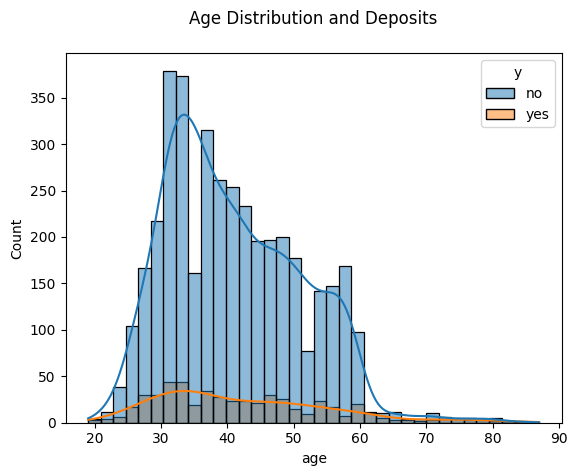

In [44]:
sns.histplot(x="age", data=bank, kde=True, hue= "y")
plt.title("Age Distribution and Deposits\n")
plt.show()

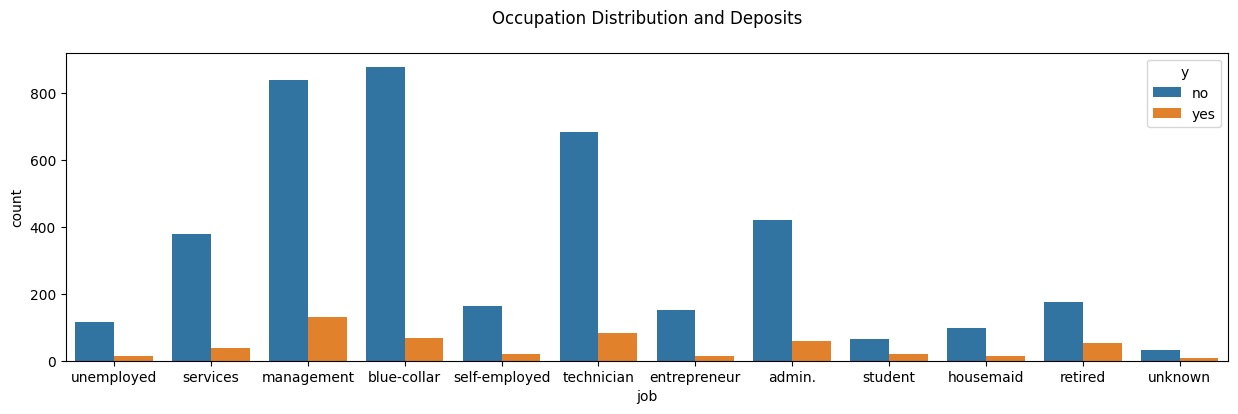

In [46]:
#Distribution of Occupation

plt.figure(figsize=(15,4))
sns.countplot(x="job", data= bank, hue ="y")
plt.title("Occupation Distribution and Deposits\n")
plt.show()

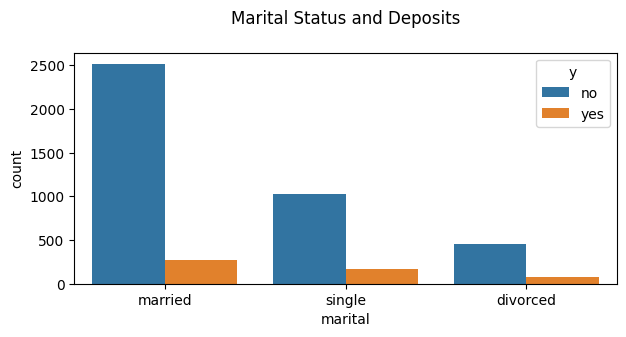

In [47]:
#Distribution of Marital Status

plt.figure(figsize=(7,3))
sns.countplot(x="marital", data= bank, hue ="y")
plt.title("Marital Status and Deposits\n")
plt.show()

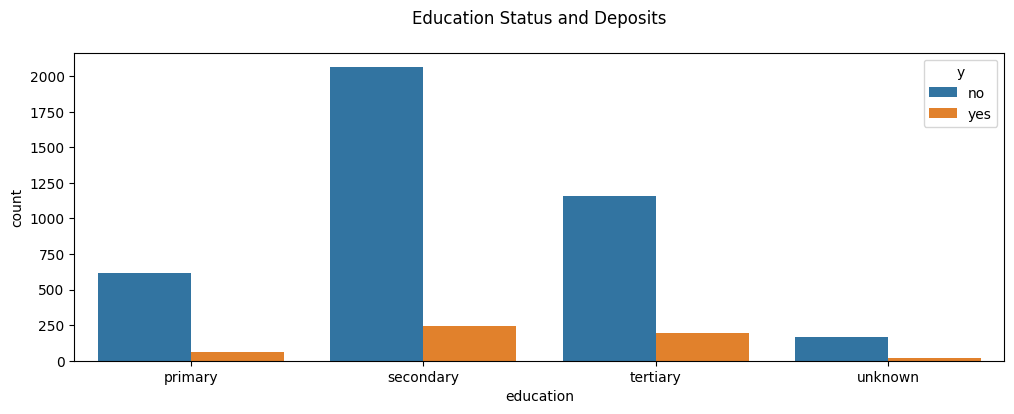

In [48]:
#Distribution of Education Status

plt.figure(figsize=(12,4))
sns.countplot(x="education", data= bank, hue ="y")
plt.title("Education Status and Deposits\n")
plt.show()

In [49]:
#Credit defaults

bank.default.value_counts()

default
no     4445
yes      76
Name: count, dtype: int64

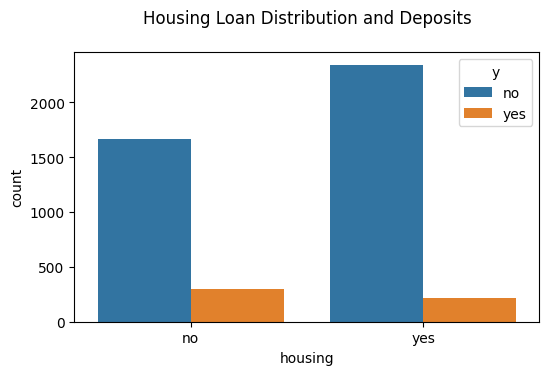

In [50]:
#Distribution of Housing Loan

plt.figure(figsize=(6,3.5))
sns.countplot(x="housing", data= bank, hue ="y")
plt.title("Housing Loan Distribution and Deposits\n")
plt.show()

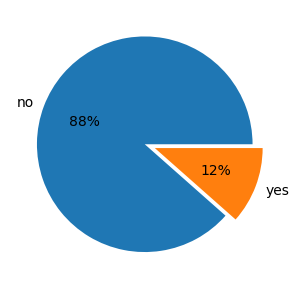

In [51]:
#Count of Outcome

bank.y.value_counts()
keys = bank.y.value_counts().index
data = bank.y.value_counts().values
plt.figure(figsize=(6,3.5))
explode = [0,0.1]
plt.pie(data,labels=keys,explode=explode, autopct='%.0f%%')
plt.show()

In [53]:
#Label Encoding Categorical Features

cols = bank.select_dtypes("object").columns
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [54]:
le = LabelEncoder()

bank[cols] = bank[cols].apply(le.fit_transform)

bank.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0


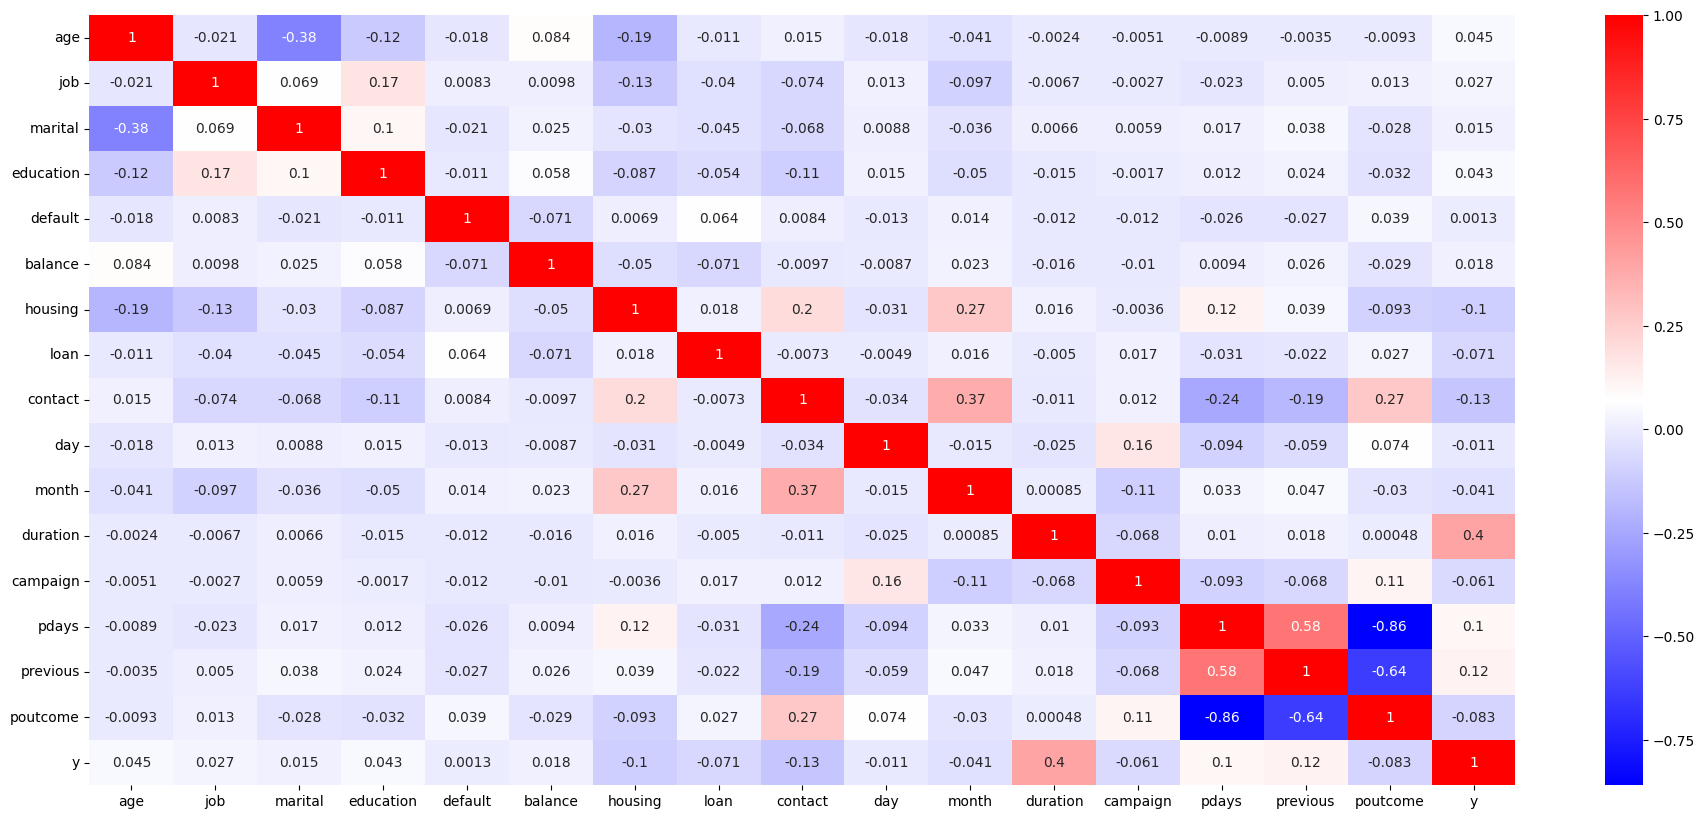

In [55]:
#Correlation Analysis using Heatmap

plt.figure(figsize=(23,10))
sns.heatmap(bank.corr(), cmap='bwr', annot=True)
plt.show()

**Standardisation**

In [56]:
#Splitting input and output
X = bank.drop("y", axis=1)
y = bank.y

scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

# **Model building - Decision Tree Classifier**

In [57]:
#Train-test split

train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.3)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)

DecisionTreeClassifier()

In [58]:
print('Train Score: {}'.format(decision_tree.score(train_X, train_y)))
print('Test Score: {}'.format(decision_tree.score(test_X, test_y)))

Train Score: 1.0
Test Score: 0.8526160648489315


In [59]:
cross_val_score(decision_tree, train_X, train_y, cv=5).mean()

0.8663042174095625

In [60]:
ypred = decision_tree.predict(test_X)
print(classification_report(test_y,ypred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1196
           1       0.38      0.38      0.38       161

    accuracy                           0.85      1357
   macro avg       0.65      0.65      0.65      1357
weighted avg       0.85      0.85      0.85      1357



# **Hyperparameter tunning**

In [62]:
#Applying Grid search cv to find best estimaters to improve model performance

param_grid = {
    'max_depth': [3, 5, 7,10, None],
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf': [3, 5, 7, 9,10,20]
    }

gscv = GridSearchCV(decision_tree, param_grid, cv=5, verbose=1)
gscv.fit(train_X, train_y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [3, 5, 7, 9, 10, 20]},
             verbose=1)

In [63]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10}

In [64]:
gscv.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)

In [65]:
cross_val_score(gscv.best_estimator_, train_X, train_y, cv=5).mean()

0.8998095266662668

In [66]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_leaf = 3)
clf.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

In [67]:
print('Train Score: {}'.format(clf.score(train_X, train_y)))
print('Test Score: {}'.format(clf.score(test_X, test_y)))

Train Score: 0.9121365360303414
Test Score: 0.8798820928518791


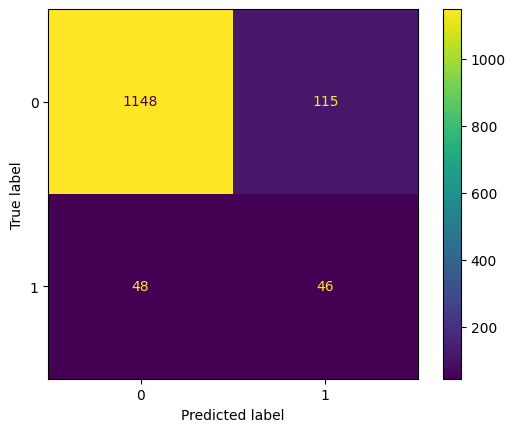

In [68]:
pred_y = clf.predict(test_X)
#Confusion Matrix
cm = confusion_matrix(pred_y, test_y)
ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot()
plt.show()

In [69]:
#Classification Report
print(classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1263
           1       0.29      0.49      0.36        94

    accuracy                           0.88      1357
   macro avg       0.62      0.70      0.65      1357
weighted avg       0.91      0.88      0.89      1357



In [70]:
#Accuracy Score
accuracy = accuracy_score(test_y,pred_y)
print("Test Accuracy of Decision Tree Classifier : {}".format(accuracy*100))

Test Accuracy of Decision Tree Classifier : 87.9882092851879


In [71]:
#Cross Validation Score
Cross_val = cross_val_score(clf, test_X,test_y, cv=5).mean()
print("Cross-Validation Accuracy Scores Decision Tree : ",Cross_val*100)

Cross-Validation Accuracy Scores Decision Tree :  89.90286520512264


# **Visualizing the Tree**

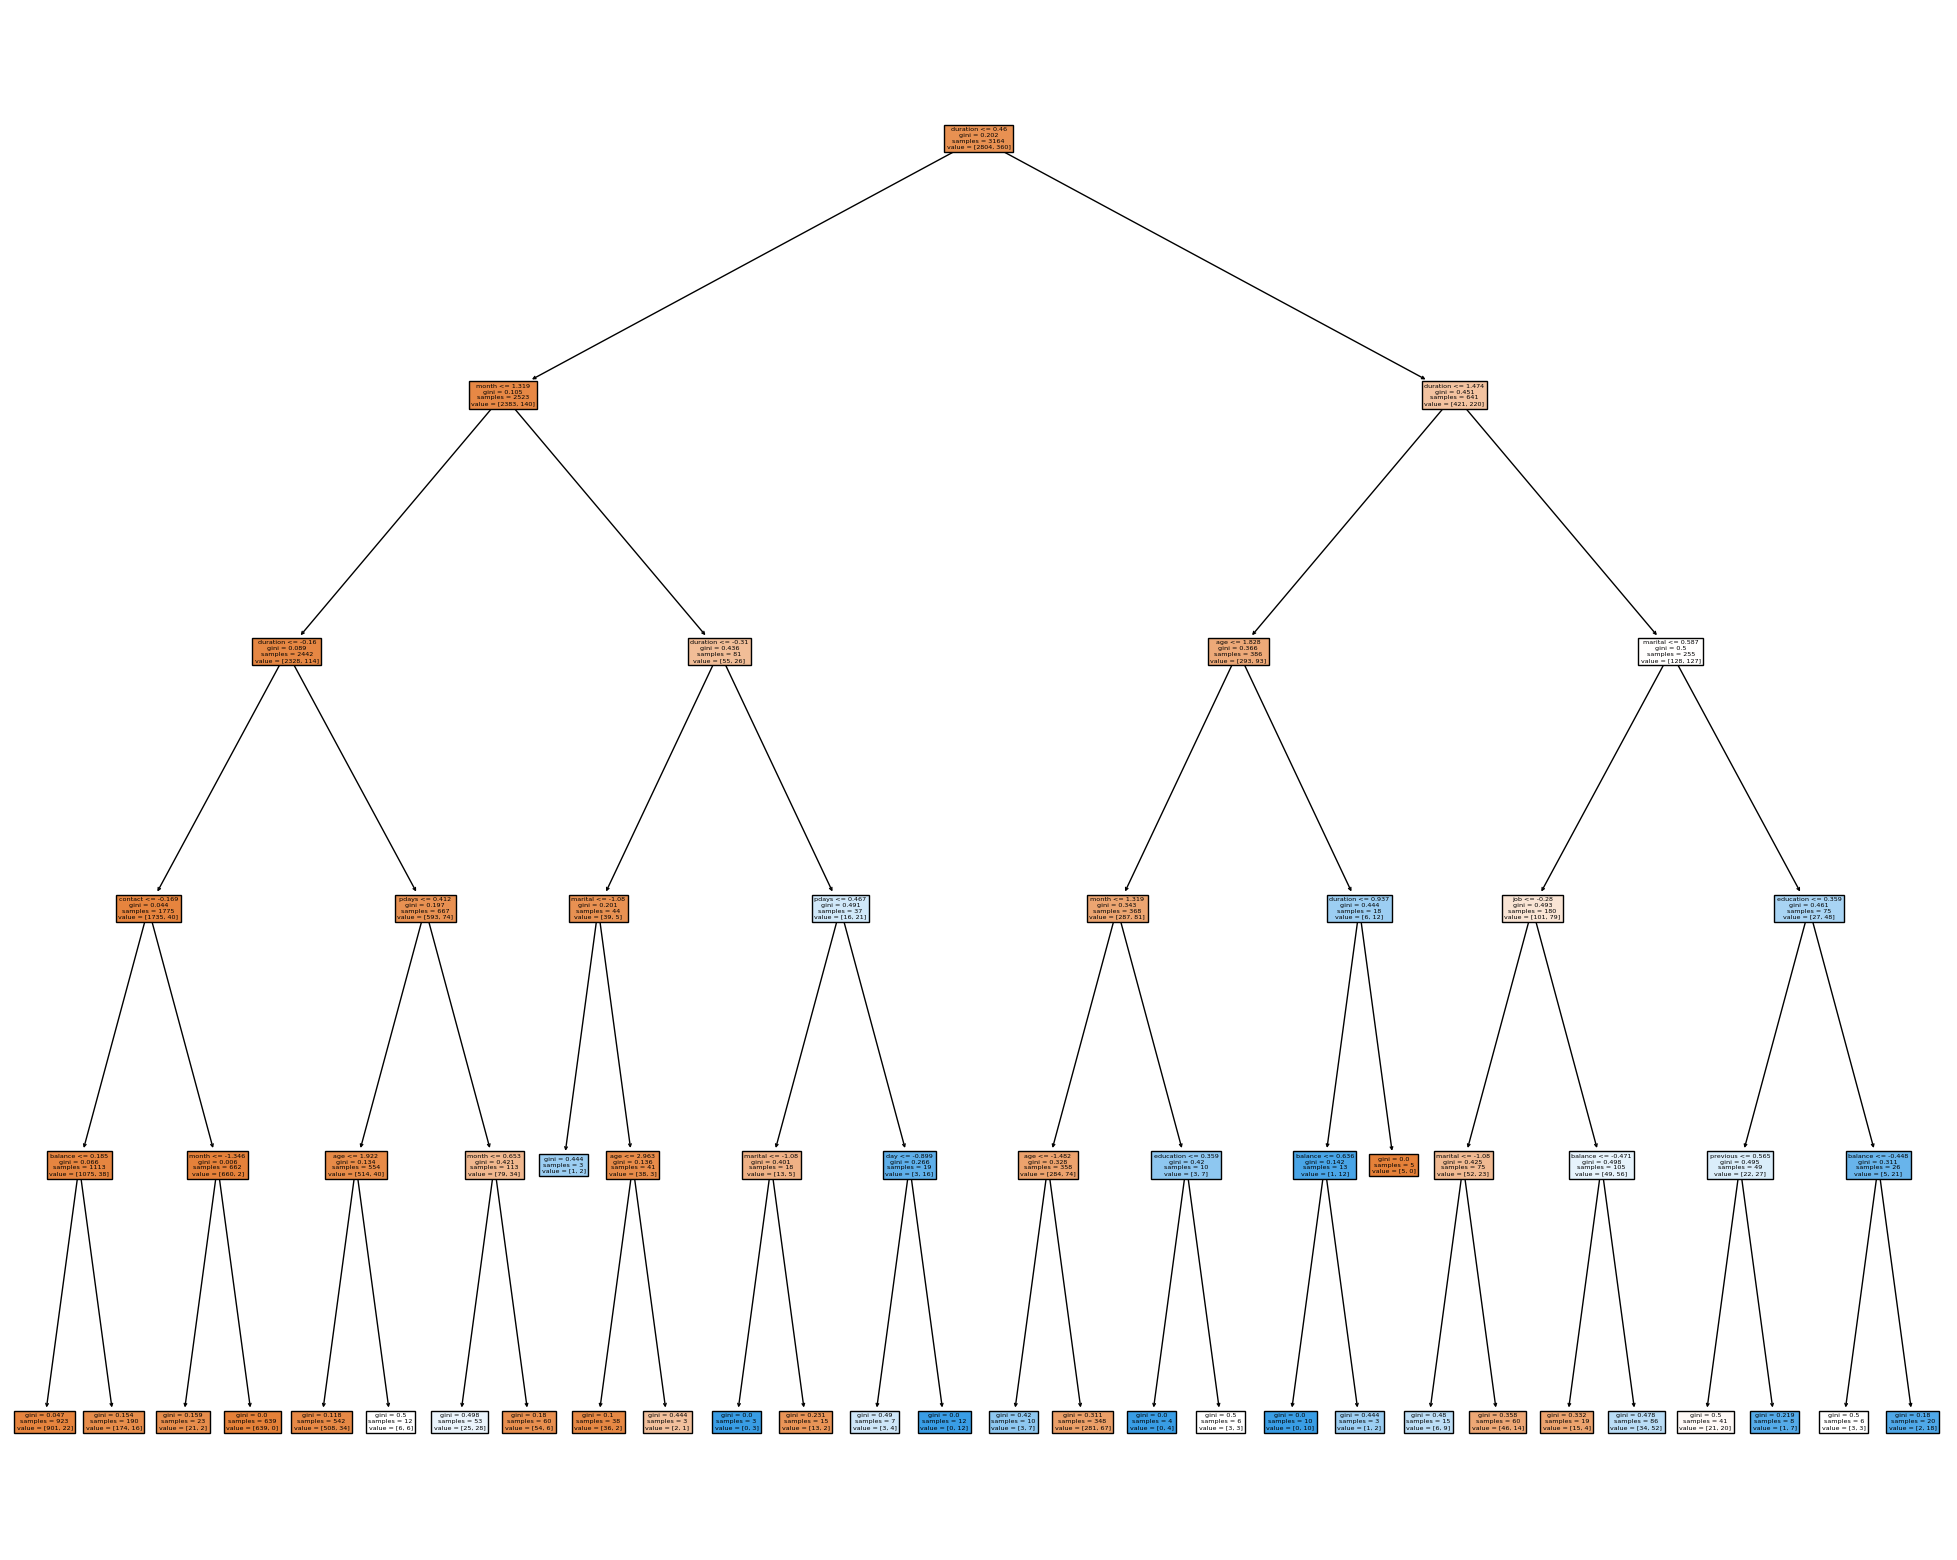

In [72]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
t= tree.plot_tree(clf,filled=True,feature_names=X.columns)